In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from basic_data_inspection import DataInspector, summary_statistics_inspection, DataTypeInspection
from missing_values_analysis import MissingValuesAnalysis, SimpleMissingValuesAnalysis
from univariate_analysis import UnivariateAnalysis, CategoricalUnivariateAnalysis, NumericalUnivariateAnalysis
from bivariate_analysis import NumericalNumericalAnalysis, NumericalCategoricalAnalysis, BivariateAnalysisContext
from multivariate_analysis import Simplemultivariate_analysis




In [2]:
# Set display options for better readability
pd.set_option('display.max_columns', None)

In [3]:
#Load the data
data_path = '../extracted_data/AmesHousing.csv'
data = pd.read_csv(data_path)

In [4]:
#Data Inspection
data_type_inspection = DataTypeInspection()
data_inspector = DataInspector(data_type_inspection)
data_inspector.execute_inspection(data)

In DataInspector class -- init method
In DataInspector class -- execute_inspection method
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2     

In [5]:
#Data Inspection on Summary Statistics
summary_statistics = summary_statistics_inspection()
data_inspector = DataInspector(summary_statistics)
data_inspector.execute_inspection(data)

In DataInspector class -- init method
In DataInspector class -- execute_inspection method
In summary_statistics_inspection class

 Summary Statistics of numerical features:
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     29

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


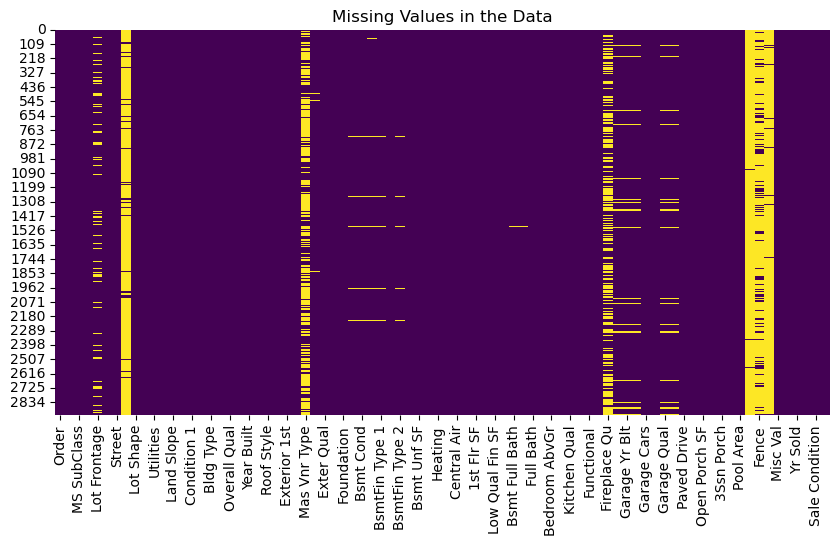

In [6]:
#Missing Values Analysis

missing_values = SimpleMissingValuesAnalysis()
missing_values.identifying_missing_values(data)
missing_values.visualizing_missing_values(data)

## Missing Values Heatmap
Colors Used in the heatmap to differentiate missing values and non-missing values: 
- **Yellow**- The missing values in the dataset
- **Purple**- The values which are not null / missing values

In the heatmap, we can identify that there are missing value columns like **'Los frontage', 'Mas Vnr Type, 'Fireplace Qu'** which have dense yellow indicating that these features have missing values.

### Understanding the distribution of missing values data
- **Randomly Distributed** : If yellow marks are scattered with noticeable pattern, it suggests that missing data might be randomly distributed.
- **Structured Missingness** : If yellow is clustered in certain rows or columns, it might indicate non-randomness. 

### Assesing the missing values:
- Columns with more yellow indicate higher proportion of missing values, which might pose a problem for model building. This could lead to biased model.
    - In heatmap, some values are missing, while others have substantial missingness. 

### Data Types and Non-null counts:
- The shape of the dataset is (2930, 82)
- The data set have 11 columns with 'float 64' type, 28 columns with 'int64' and 43 columns with 'object' data type.

#### Summary statistics:
- **Numerical Features**
    - The target value 'SalePrice' has a mean of **$180,796** with standard deviation of **$79,886** which indicates that the data column is significantly spread.
    - 'Overall Quality' ranges from **1 to 10** with a mean of **6.09** whowing high quality on average.
    - 'Year Built' ranges from **1872 to 2010** which means that there are both new and old houses in the datset.
    - 'Lot area' has a wide range with extreme outliers, which might indicate large properties.
- **Categorical Features**
    - **Neighborhood** has '28' unique values with Names being most common, suggesting some neighborhood can be dominating.
    - `Alley` has a high frequency of missing values (discussed below).

#### Missing values Analysis
- 'Alley' has **2732** missing values almost unusable  without imputation.
- 'Pool Qc' has **2917** missing values indicating only very few houses have pools.
- `Misc Feature` has **2824 missing values** (96.4% missing), indicating that most houses do not have miscellaneous features

- **Columns with Moderate Missing Values**:
  - `Garage Type`, `Garage Yr Blt`, `Garage Finish`, `Garage Qual`, `Garage Cond` each have **159 missing values** (~5.4%), likely corresponding to houses without garages.
  - `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2` each have **around 80 missing values** (~2.7%), likely representing houses without basements.
  - `Mas Vnr Type` (masonry veneer type) has **1775 missing values** (~60.6%), and `Mas Vnr Area` has **23 missing values**. This might indicate many houses do not have masonry veneer.

**Handling Missing Values**
- ***High frequency missing values***: Columns like 'Alley', 'Pool QC', 'Fence' have high percentage of missing data. Decisions need to be whether to: drop the data or to impute missing values with a placeholder like 'No pool'
- ***Moderate Missing values***: These need to be imputed with respective placeholders. THe categorical columns can be filled with "No Garage" or other values and zeros for numerical values.
- ***Single Missing Values***: These can likely be filled with mode or mean depending upon the variance, standard deviation of the column.

**Outlier Detection and Handling**
- Features like 'Lot Area', 'Gr Liv Area' show significant range, indicating potential outliers. These will need to be detected and handled properly to avoid skewing model.

**Categorical Encoding**
- Some categorical features like 'Neighborhood', 'MS Zoning', 'Bldg Type' have many unique values. Decisions need to be made on the approach that needs to be taken (e.g. one-hot encoding, label encoding)

**Feature Engineering**
- Based on insights, certain features might need to be engineered to better capture relationships in the data.

**Correlation and Multicollinearlity**
- Initial correlation analysis suggests that features might have high correlation with each other. 



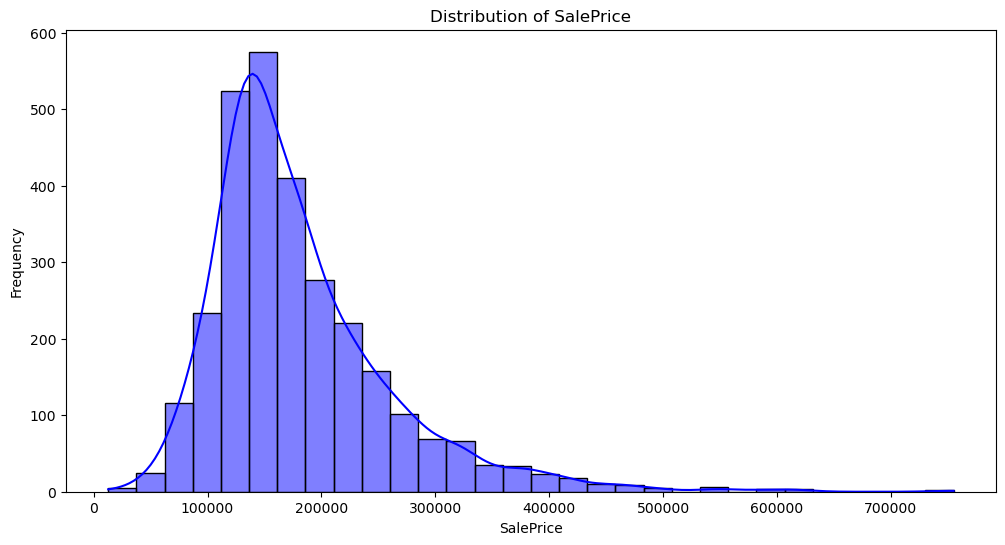

In [7]:
#Univariate Analysis
univariate_analysis = UnivariateAnalysis(NumericalUnivariateAnalysis())
univariate_analysis.execute_strategy(data, 'SalePrice')


d:\projects\price_prediction\src_analysis\univariate_analysis.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= feature, data=data, palette= 'muted')


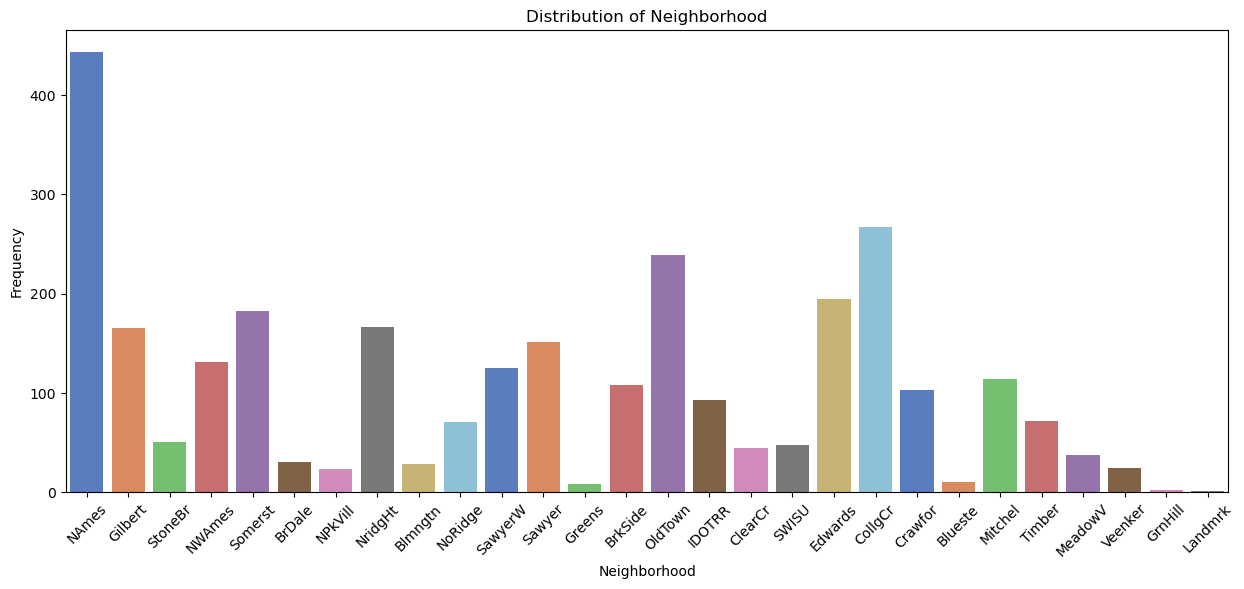

In [8]:
#Categorical Univariate Analysis
Cat_univariate_analysis = UnivariateAnalysis(CategoricalUnivariateAnalysis())
Cat_univariate_analysis.execute_strategy(data, 'Neighborhood')

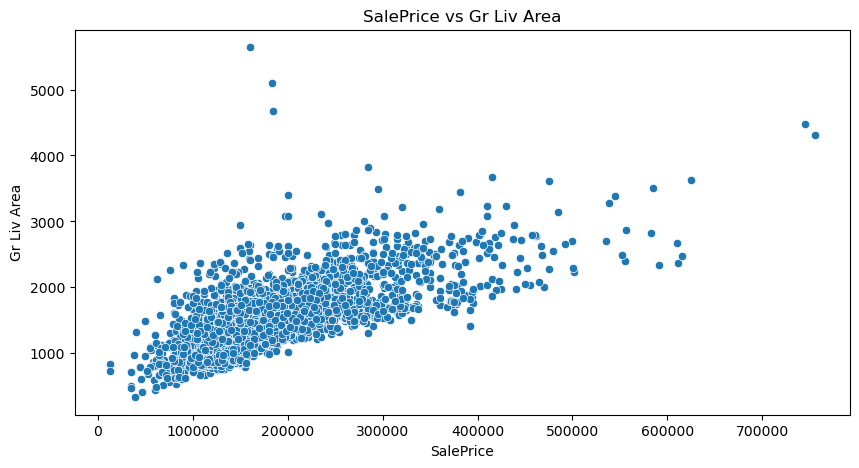

In [11]:
#Bivariate Analysis

#Analyzing the relationship between two Numerical variables
bivariate_analysis = BivariateAnalysisContext(NumericalNumericalAnalysis())
bivariate_analysis.execute_analysis(data, 'SalePrice', 'Gr Liv Area')


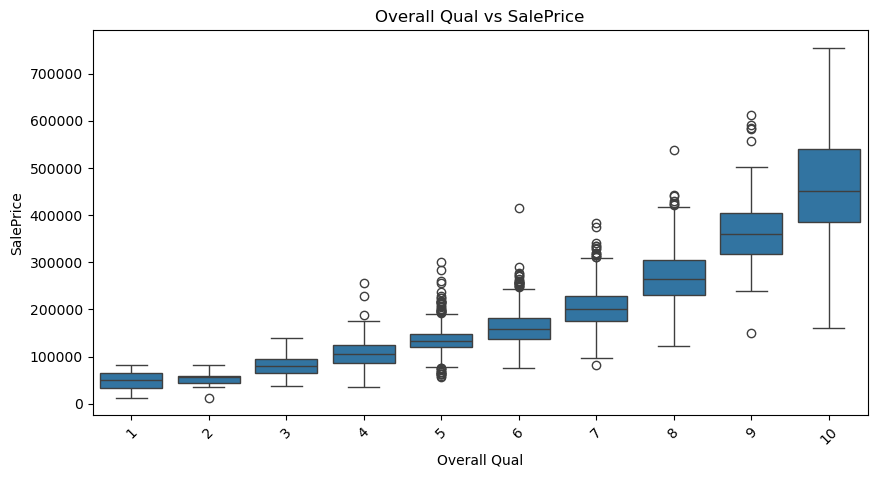

In [15]:
# Relationship between a Numerical and a Categorical variable
bivariate_analysis2 = BivariateAnalysisContext(NumericalCategoricalAnalysis())
bivariate_analysis2.execute_analysis(data,  'Overall Qual', 'SalePrice')

### Insights from Univariate Analysis

- **SalePrice Distribution**
    - The distribution is positively skewed with majority of the proces falling between '$100k' to '$200k'. The highest frequency is almost '$200k'.
    - This insights tells us that most of the houses ae affordable and the long tail in the right states that the houses with higher prices are low in number.
- **Neighborhood Distribution**
    - The neighborhood feature shows that 'NAmes' being the most common neighborhood, followed by 'CollgCr'. Some have few observations.
    - High frequency of certain neighborhoods suggests that these areas could significantly influence overall housing prices. Neighborhoods with fewer observations might require careful handling to avoid overfitting during the model training. Potentially we can use techniques like frequency encoding.

### Bivariate Analysis insights

- **Gr Living area Vs SalePrice**
    - There is a strong positive correlation between these two features. As the space of the house increases the sale price also increase in the same manner.
    - 'Gr Living area' feature is a strong predictor of the 'Sale Price'. There might be chances of outliers which means that the smaller homes might have high price or vice versa.

- **Overall Qual Vs. SalePrice**
    - There is a clear relationship between these two features indicating that the higher Quality homes have significantly higher prices. The box plot shows that increasing medians and ranges as quality improves, with some variability in each category.
    - 'Overall Qual' is a good predictor of Sale price since it shows that the consistent increase in sale price with higher quality ratings suggests that home buyers highly value quality.

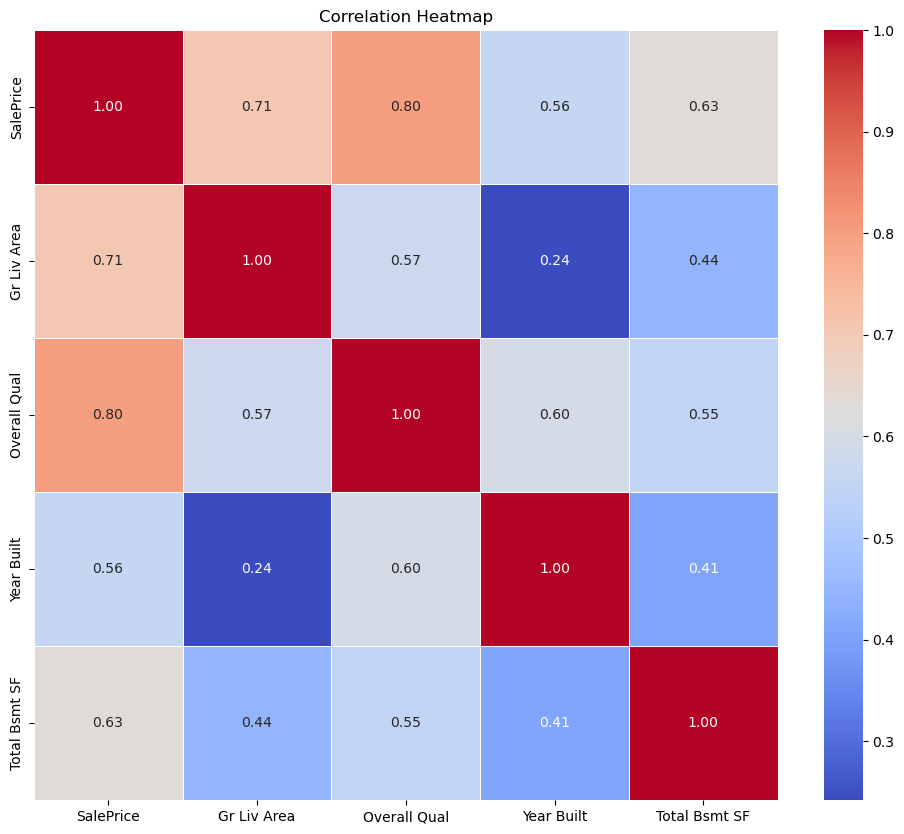

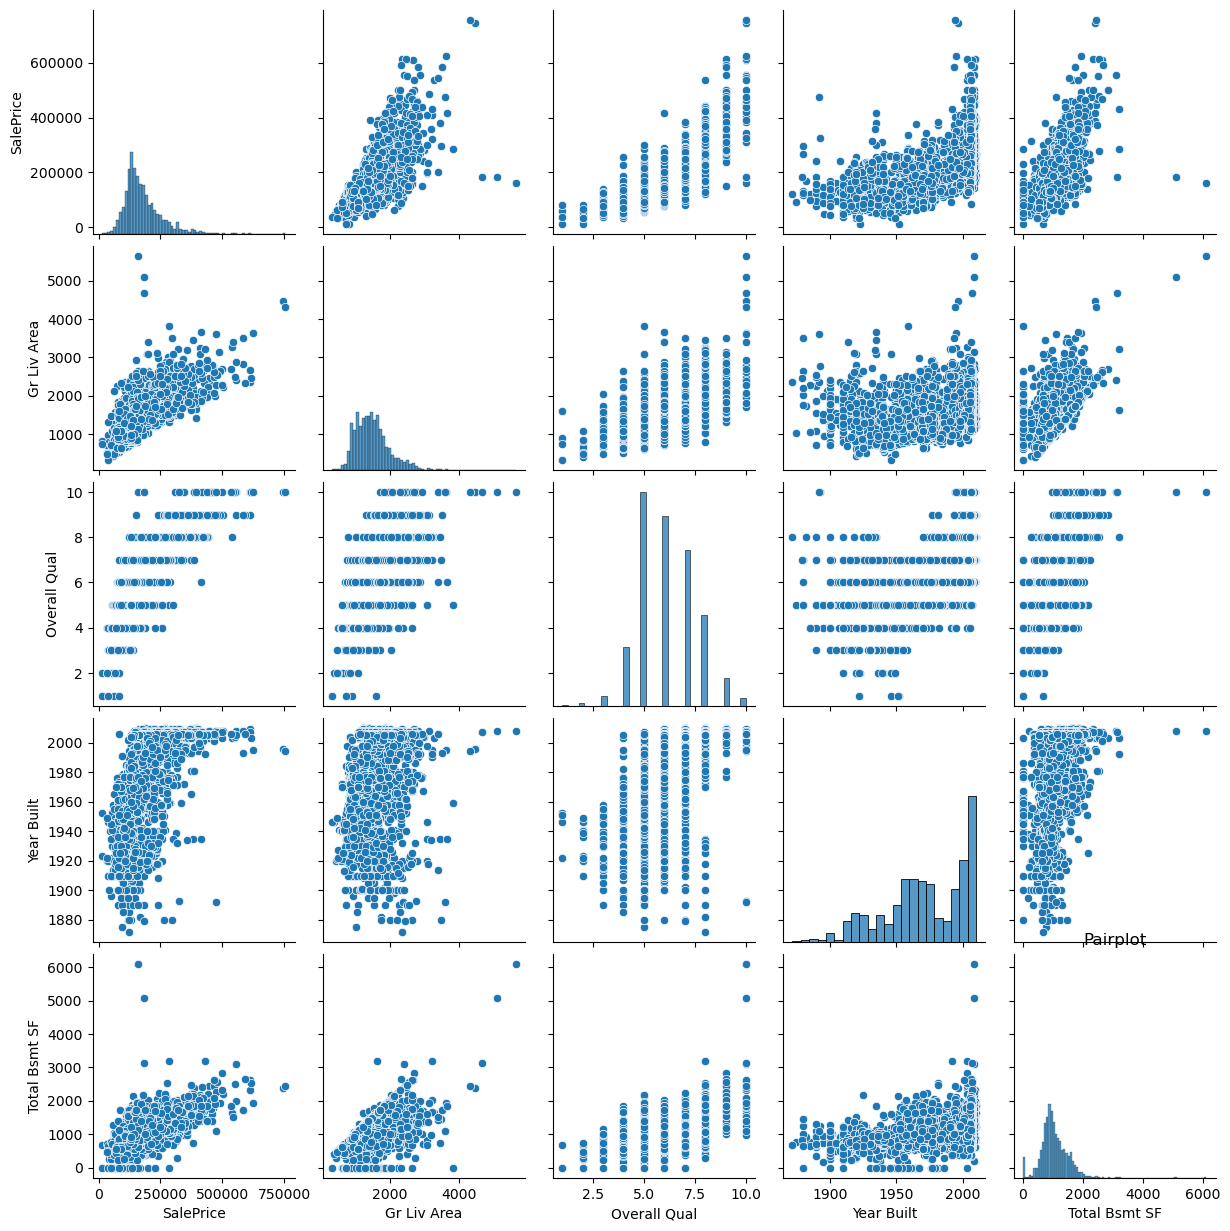

In [17]:
# Multivariate Analysis

multivariate_analysis = Simplemultivariate_analysis()
multivariate_analysis.analyze(data[['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Year Built', 'Total Bsmt SF']])

### Insights from Multivariate Analysis
- Correlation Heatmap
    - **SalePrice and Over Qual**: The highest correlation between the features selected is with this pair(0.8). 'Over Qual' feature can be the good predictor of 'SalePrice'
    - **SalePrice and GR Liv Area**: 'Gr Liv Area' also have high correlation of 0.71 indicating this feature is can also be considered as a critical predictor.
    - **Total bsmt SF and Year Built**: 'Total bsmt SF' and 'Year Built' are moderate predictors with correlation of 0.63 and 0.56 respectively.